In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
# controlling figure aesthetics: set font size, color, and style using seaborn
sns.set(font_scale=1.3)
sns.set_palette("husl")
sns.set_style("white")
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.iloc[:1] #return the first row formatted as a table
recent_grads.info()
recent_grads.head() #getting familiar with the data structure
recent_grads.describe() #summary stats for all numeric columns
raw_data_count = len(recent_grads.index)
raw_data_count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

173

In [4]:
#dropping rows containing missing values
recent_grads = recent_grads.dropna()
recent_grads

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


In [5]:
#checking number of rows of cleaned Dataframe
cleaned_data_count = len(recent_grads.index)
cleaned_data_count

172

In [6]:
#comparing 
'raw_data_count:'+str(raw_data_count)+'|'+'cleaned_data_count:'+str(cleaned_data_count)

'raw_data_count:173|cleaned_data_count:172'

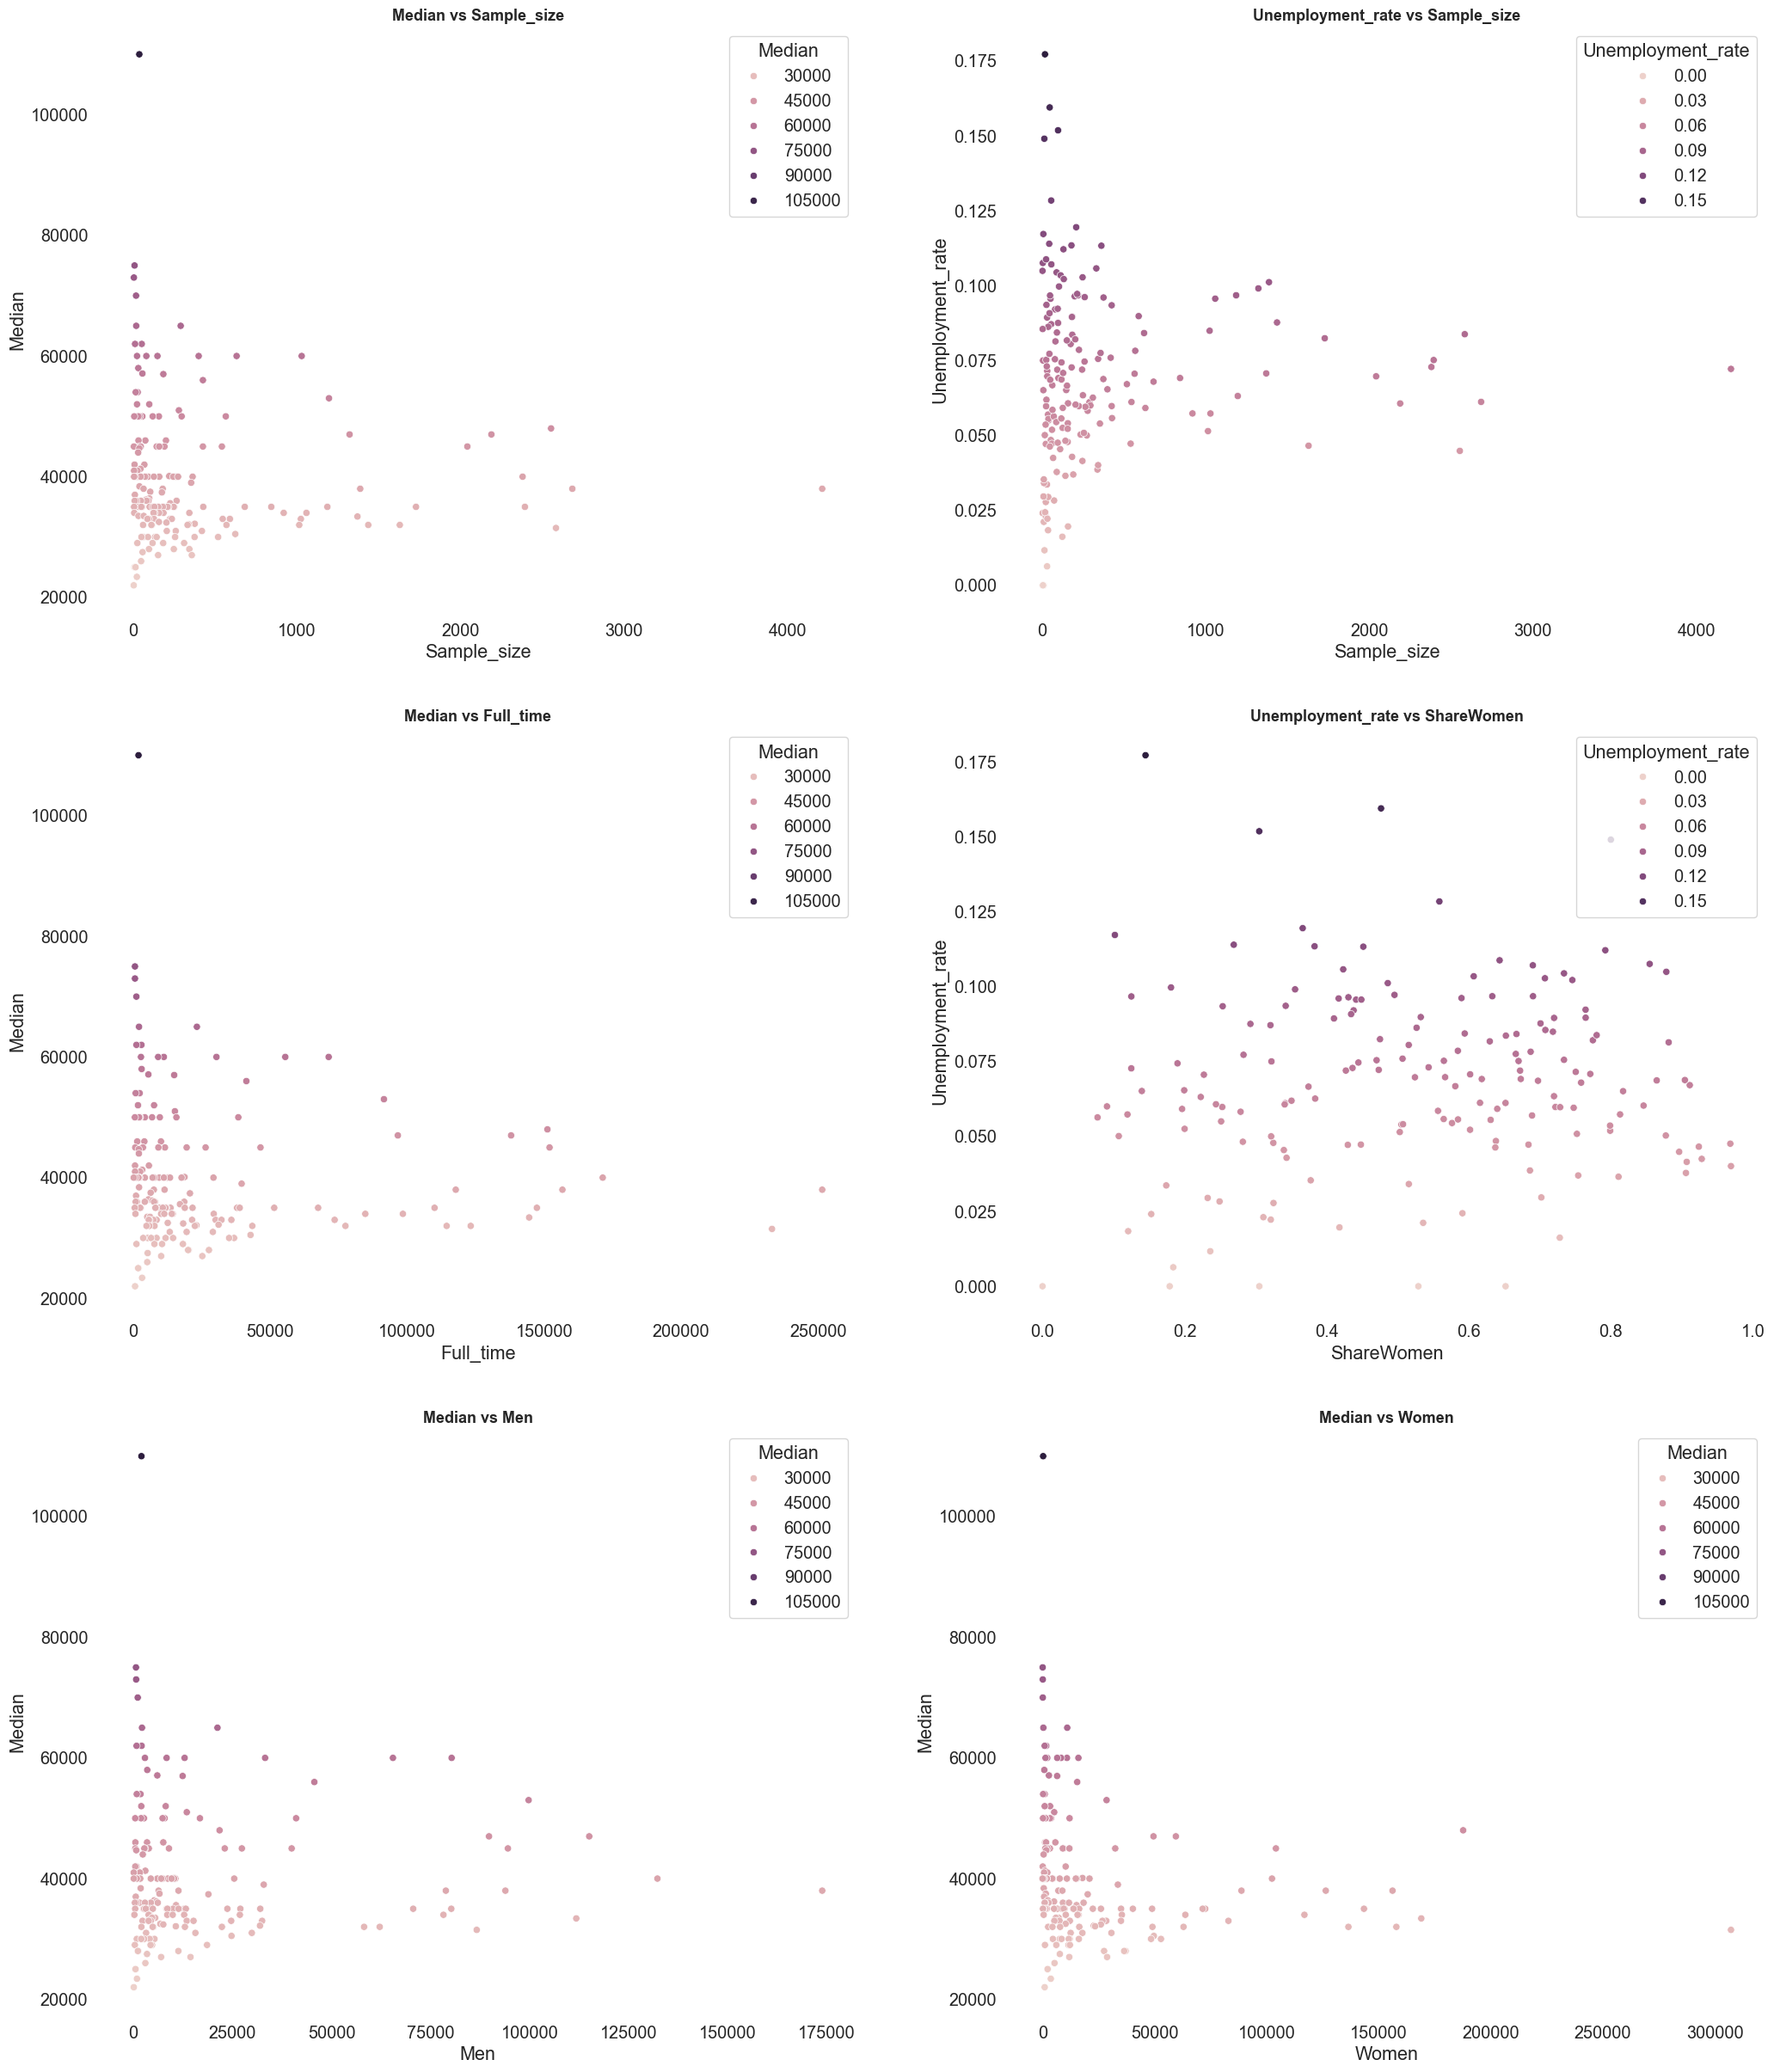

In [7]:
#generating scatterplots in a go using a for loop
x_val = ['Sample_size','Sample_size','Full_time','ShareWomen','Men','Women']
y_val = ['Median','Unemployment_rate','Median','Unemployment_rate','Median','Median']
fig = plt.figure(figsize=(25,30))
for sp in range (len(x_val)):
    ax = fig.add_subplot(3,2,sp+1)
    ax = sns.scatterplot(data=recent_grads, x= x_val[sp], y= y_val[sp], hue= y_val[sp])
    plt.title(y_val[sp] + ' vs ' + x_val[sp], weight='bold').set_fontsize('13')
    sns.despine(left=True, bottom=True)
    plt.legend
plt.show()

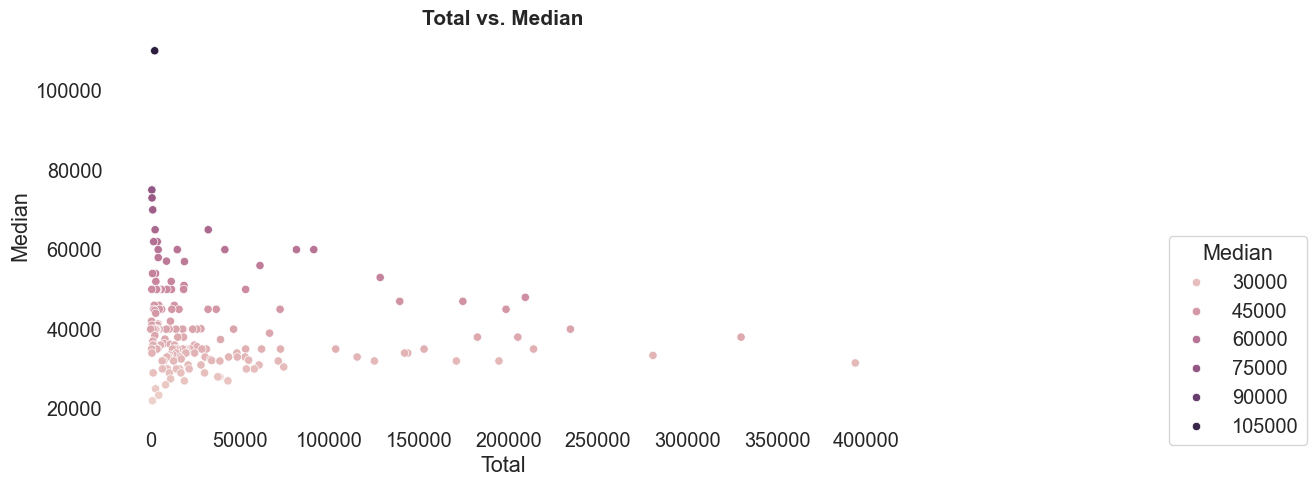

In [8]:
#finding if students make more money in popular school majors - they don't.
fig, ax = plt.subplots(1,1, figsize =(10,5))
sns.scatterplot(data = recent_grads, x='Total', y='Median', hue ='Median')
sns.despine(left=True, bottom=True)
plt.title('Total vs. Median', weight='bold').set_fontsize('15')
plt.legend(bbox_to_anchor=(1.55, 0.5), title= 'Median')
plt.show()

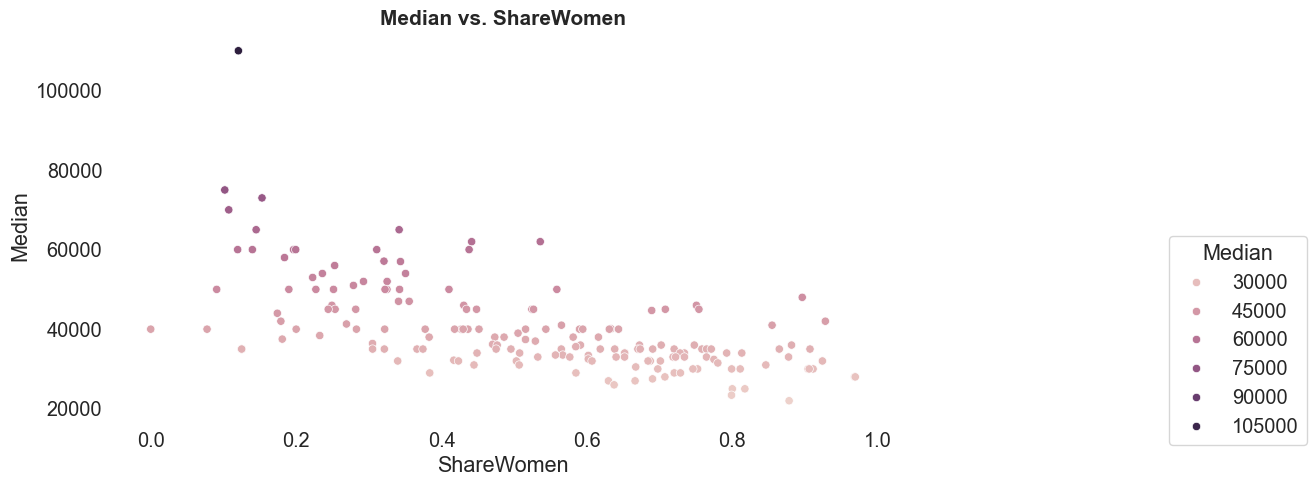

In [9]:
#finding if students that majored in subjects that were majorly female make more money
#-ShareWomen = women as share of total
#-Median = median salary of full time , year-round workers.
fig, ax =plt.subplots(1,1, figsize =(10,5))
sns.scatterplot(data = recent_grads, x='ShareWomen', y='Median', hue ='Median')
sns.despine(left=True, bottom=True)
plt.title('Median vs. ShareWomen', weight='bold').set_fontsize('15')
plt.legend(bbox_to_anchor=(1.55,0.5), title= 'Median')
plt.show()

In [10]:
#deep dive intp median and sharewomen using groupby()
median_sharewomen = recent_grads.groupby(["ShareWomen"])["Median"].mean().sort_values(ascending=False)
median_sharewomen

ShareWomen
0.120564    110000.0
0.101852     75000.0
0.153037     73000.0
0.107313     70000.0
0.144967     65000.0
              ...   
0.637293     26000.0
0.799859     25000.0
0.817099     25000.0
0.798746     23400.0
0.877960     22000.0
Name: Median, Length: 172, dtype: float64

In [11]:
sharewomen_grouped = recent_grads["ShareWomen"].value_counts(bins=3).sort_values(ascending=False)
sharewomen_grouped

(0.323, 0.646]                     71
(0.646, 0.969]                     60
(-0.0019690000000000003, 0.323]    41
Name: ShareWomen, dtype: int64

In [12]:
#using sns.barplot to create 3 bins
bins = [-0.0019690000000000003, 0.323, 0.646, 0.969] #using bins from previous results
median_sharewomen_grouped = recent_grads.groupby(pd.cut(recent_grads["ShareWomen"],
                                                 bins))["Median"].mean().sort_values(ascending= False)
median_sharewomen_grouped

ShareWomen
(-0.00197, 0.323]    50846.341463
(0.323, 0.646]       39695.774648
(0.646, 0.969]       33168.333333
Name: Median, dtype: float64

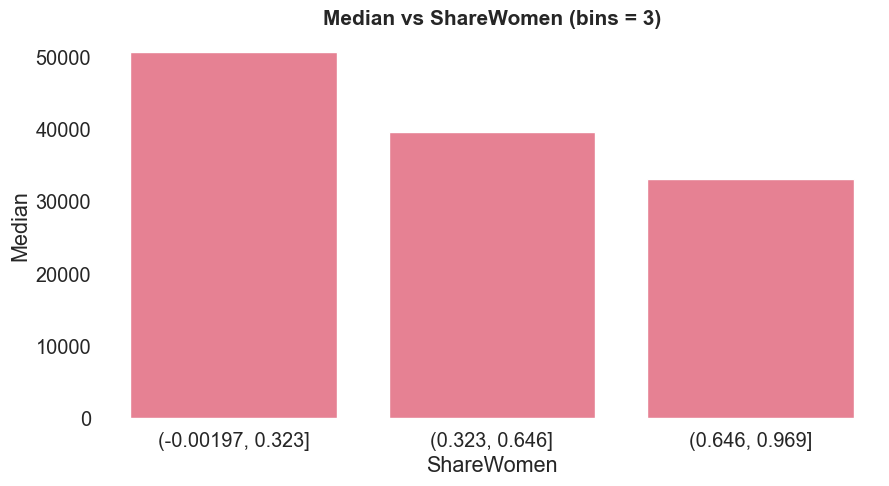

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.xlabel('ShareWomen')
plt.ylabel('Median')
sns.barplot(x=sorted(median_sharewomen_grouped.index), y=median_sharewomen_grouped, errorbar=None)
plt.title('Median vs ShareWomen (bins = 3)', weight='bold', fontsize=15)
sns.despine(left=True, bottom=True)
plt.show()

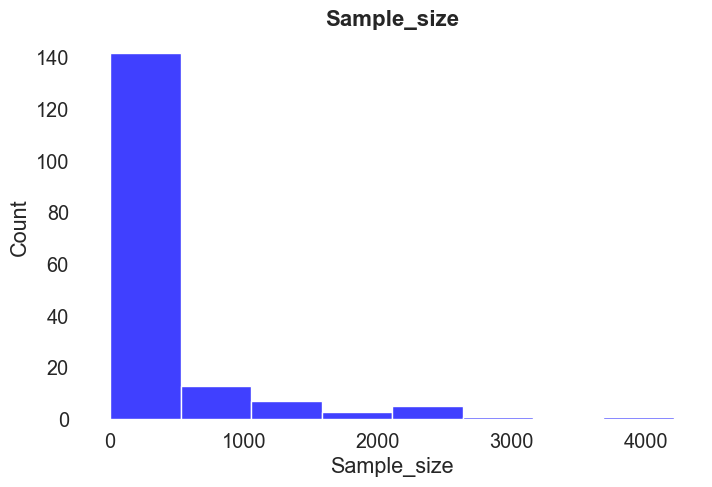

-------------------------------
count     172.000000
mean      357.941860
std       619.680419
min         2.000000
25%        42.000000
50%       131.000000
75%       339.000000
max      4212.000000
Name: Sample_size, dtype: float64
-------------------------------


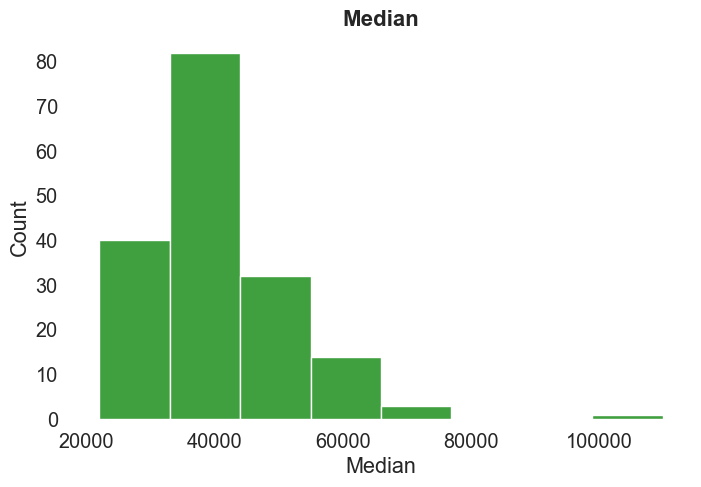

-------------------------------
count       172.000000
mean      40076.744186
std       11461.388773
min       22000.000000
25%       33000.000000
50%       36000.000000
75%       45000.000000
max      110000.000000
Name: Median, dtype: float64
-------------------------------


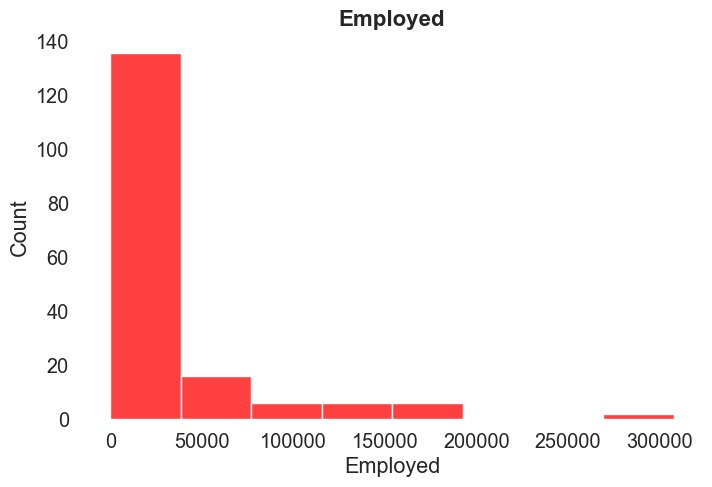

-------------------------------
count       172.00000
mean      31355.80814
std       50777.42865
min           0.00000
25%        3734.75000
50%       12031.50000
75%       31701.25000
max      307933.00000
Name: Employed, dtype: float64
-------------------------------


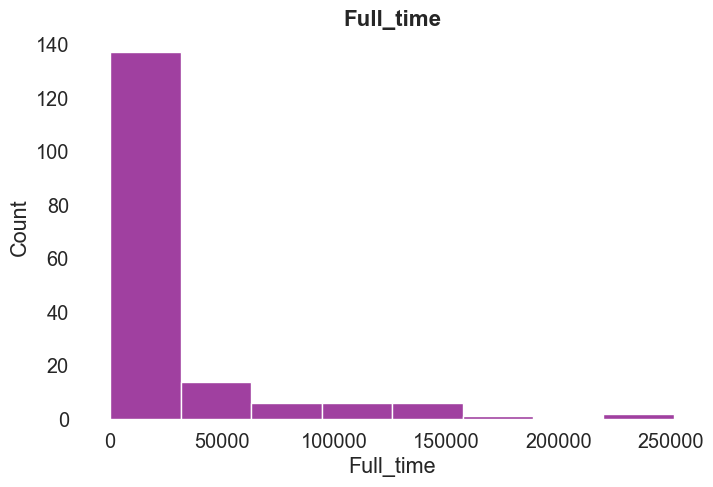

-------------------------------
count       172.000000
mean      26165.767442
std       42957.122320
min         111.000000
25%        3181.000000
50%       10073.500000
75%       25447.250000
max      251540.000000
Name: Full_time, dtype: float64
-------------------------------


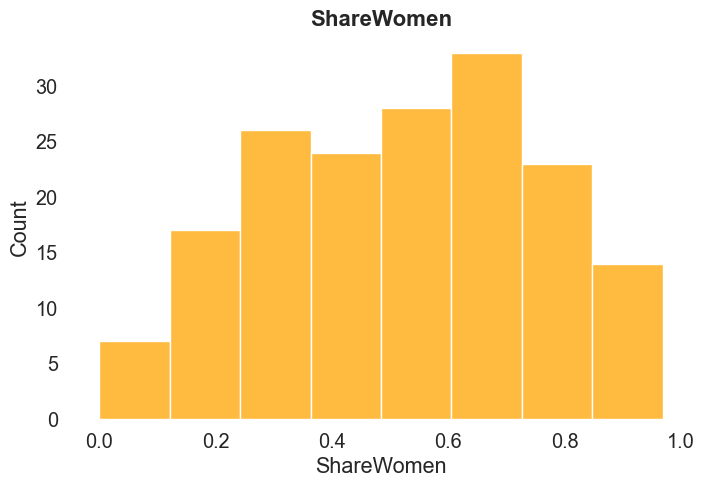

-------------------------------
count    172.000000
mean       0.522223
std        0.231205
min        0.000000
25%        0.336026
50%        0.534024
75%        0.703299
max        0.968954
Name: ShareWomen, dtype: float64
-------------------------------


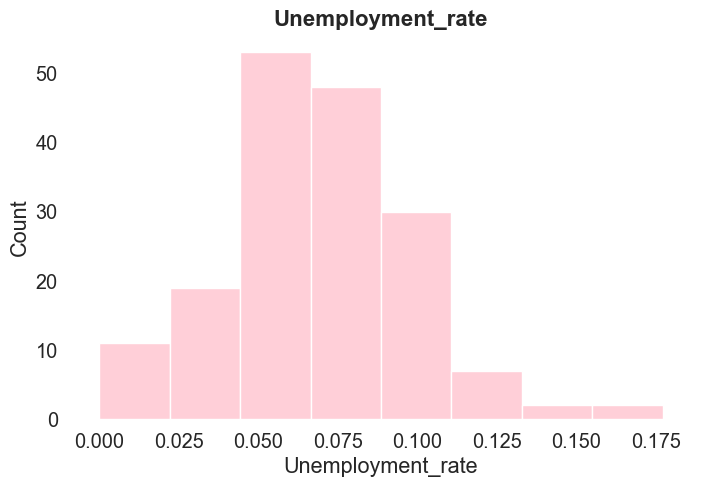

-------------------------------
count    172.000000
mean       0.068024
std        0.030340
min        0.000000
25%        0.050261
50%        0.067544
75%        0.087247
max        0.177226
Name: Unemployment_rate, dtype: float64
-------------------------------


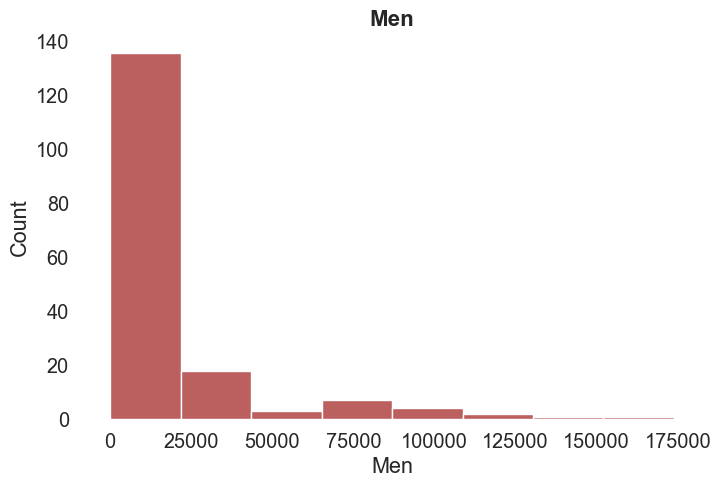

-------------------------------
count       172.000000
mean      16723.406977
std       28122.433474
min         119.000000
25%        2177.500000
50%        5434.000000
75%       14631.000000
max      173809.000000
Name: Men, dtype: float64
-------------------------------


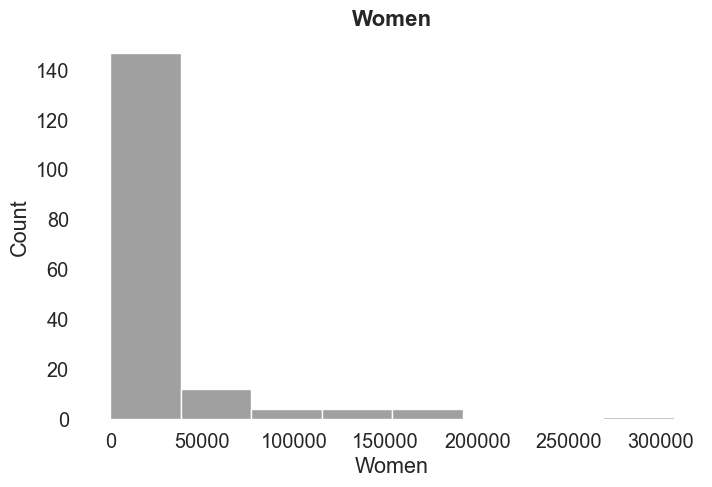

-------------------------------
count       172.000000
mean      22646.674419
std       41057.330740
min           0.000000
25%        1778.250000
50%        8386.500000
75%       22553.750000
max      307087.000000
Name: Women, dtype: float64
-------------------------------


In [14]:
###generate histograms in a go using a for loop
#using 8 bins to simplify the visuals

cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]
colors = ['blue','green','red','purple','orange','pink','brown','gray']
# Iterate through the columns
for i, col in enumerate(cols):
    # Create a new figure for each histogram
    plt.figure(figsize=(8, 5))
    # Plot the histogram
    sns.histplot(data=recent_grads, x=col, bins=8, color=colors[i])
    sns.despine(left=True, bottom=True)
    plt.title(col, weight='bold', fontsize=16)
    plt.show()
    # Display statistics
    print('-------------------------------')
    print(recent_grads[col].describe())
    print('-------------------------------')


In [15]:
###analysis: going deep on Sample_size, Employed, SharedWomen, and Women
#exploring Sample_size: finding the percentage of sample size by dividing Sample_size by Full_time_year_round
common_samplesize = recent_grads[recent_grads["Sample_size"].between(0,500)]
common_samplesize.sort_values(by='Sample_size', ascending=False)
common_samplesize

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


In [16]:
##calculating the sample size percentage of the dataset
sample_dataset = recent_grads["Sample_size"] / recent_grads["Full_time_year_round"]
sample_dataset.describe()
sample_dataset.describe()

count    172.000000
mean       0.017747
std        0.004970
min        0.004162
25%        0.015208
50%        0.017751
75%        0.020870
max        0.036036
dtype: float64

In [17]:
#checking majors(0) with zero(0) people employed
print(recent_grads[recent_grads["Employed"] == 0])

    Rank  Major_code                  Major  Total    Men  Women  \
73    74        3801  MILITARY TECHNOLOGIES  124.0  124.0    0.0   

                         Major_category  ShareWomen  Sample_size  Employed  \
73  Industrial Arts & Consumer Services         0.0            4         0   

    ...  Part_time  Full_time_year_round  Unemployed  Unemployment_rate  \
73  ...          0                   111           0                0.0   

    Median  P25th  P75th  College_jobs  Non_college_jobs  Low_wage_jobs  
73   40000  40000  40000             0                 0              0  

[1 rows x 21 columns]


In [19]:
###checking how many majors are predominantly male
#adding a new column
recent_grads["gender_majority"] = np.nan
recent_grads

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,gender_majority
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,1207,37,0.018381,110000,95000,125000,1534,364,193,NaN
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,388,85,0.117241,75000,55000,90000,350,257,50,NaN
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,340,16,0.024096,73000,50000,105000,456,176,0,NaN
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,692,40,0.050125,70000,43000,80000,529,102,0,NaN
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,16697,1672,0.061098,65000,50000,75000,18314,4440,972,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,3602,304,0.046320,26000,20000,39000,2771,2947,743,NaN
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,1211,148,0.065112,25000,24000,34000,1488,615,82,NaN
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,1293,368,0.149048,25000,25000,40000,986,870,622,NaN
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,2738,214,0.053621,23400,19200,26000,2403,1245,308,NaN


In [20]:
#adding values to the new column
recent_grads.loc[recent_grads["ShareWomen"] > .5, "gender_majority"] = "Female"
recent_grads.loc[recent_grads["ShareWomen"] < .5, "gender_majority"] = "Male"
recent_grads

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,gender_majority
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,1207,37,0.018381,110000,95000,125000,1534,364,193,Male
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,388,85,0.117241,75000,55000,90000,350,257,50,Male
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,340,16,0.024096,73000,50000,105000,456,176,0,Male
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,692,40,0.050125,70000,43000,80000,529,102,0,Male
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,16697,1672,0.061098,65000,50000,75000,18314,4440,972,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,3602,304,0.046320,26000,20000,39000,2771,2947,743,Female
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,1211,148,0.065112,25000,24000,34000,1488,615,82,Female
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,1293,368,0.149048,25000,25000,40000,986,870,622,Female
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,2738,214,0.053621,23400,19200,26000,2403,1245,308,Female


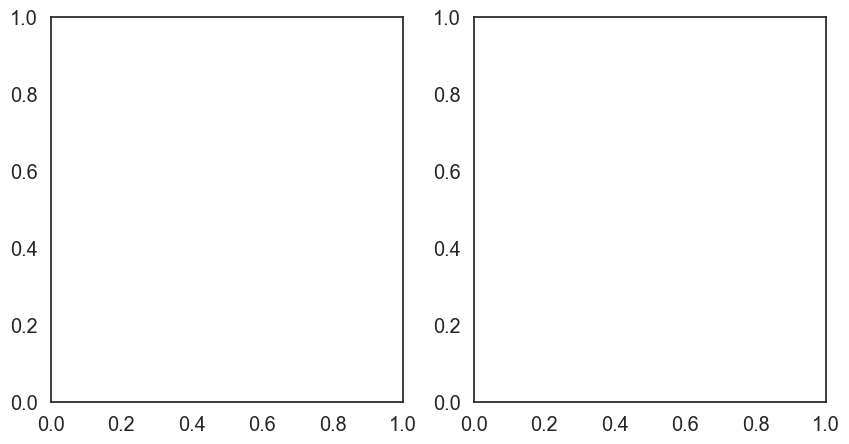

In [21]:
# Create a figure with 1 row and 8 columns
fig = plt.subplots(1,2, figsize =(10,5))

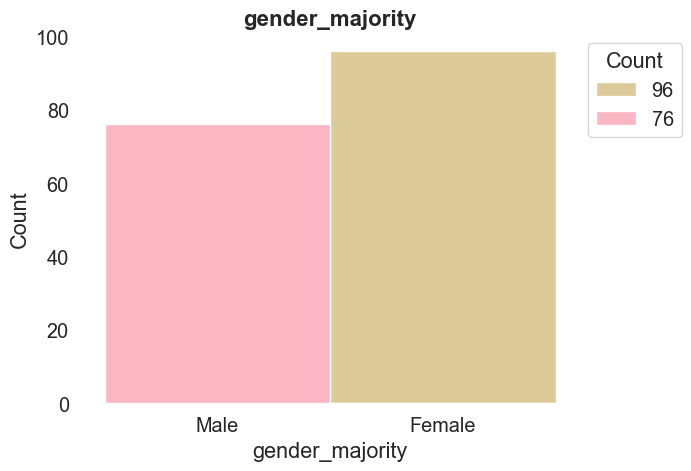

In [22]:
sns.histplot(data = recent_grads, x= "gender_majority", hue = "gender_majority") 
sns.despine(left=True, bottom=True)
plt.title("gender_majority", weight='bold', fontsize=16)

#display #count on legend
plt.legend([str(count) for count in recent_grads["gender_majority"].value_counts()], bbox_to_anchor=(1, 1), title='Count')
plt.show()

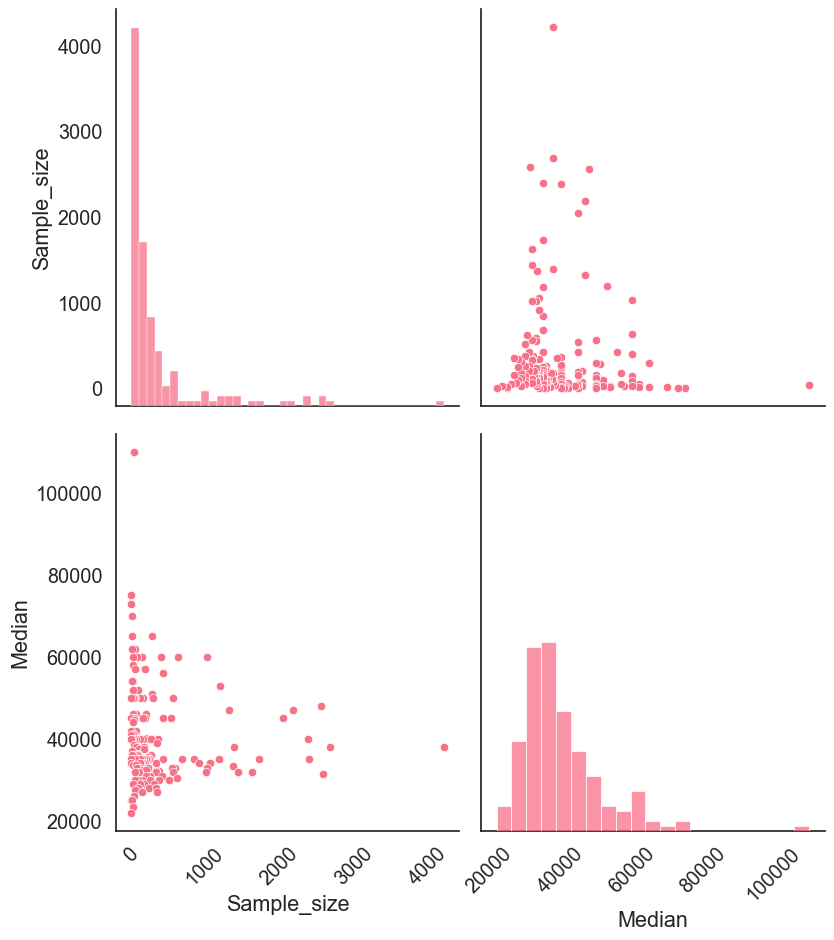

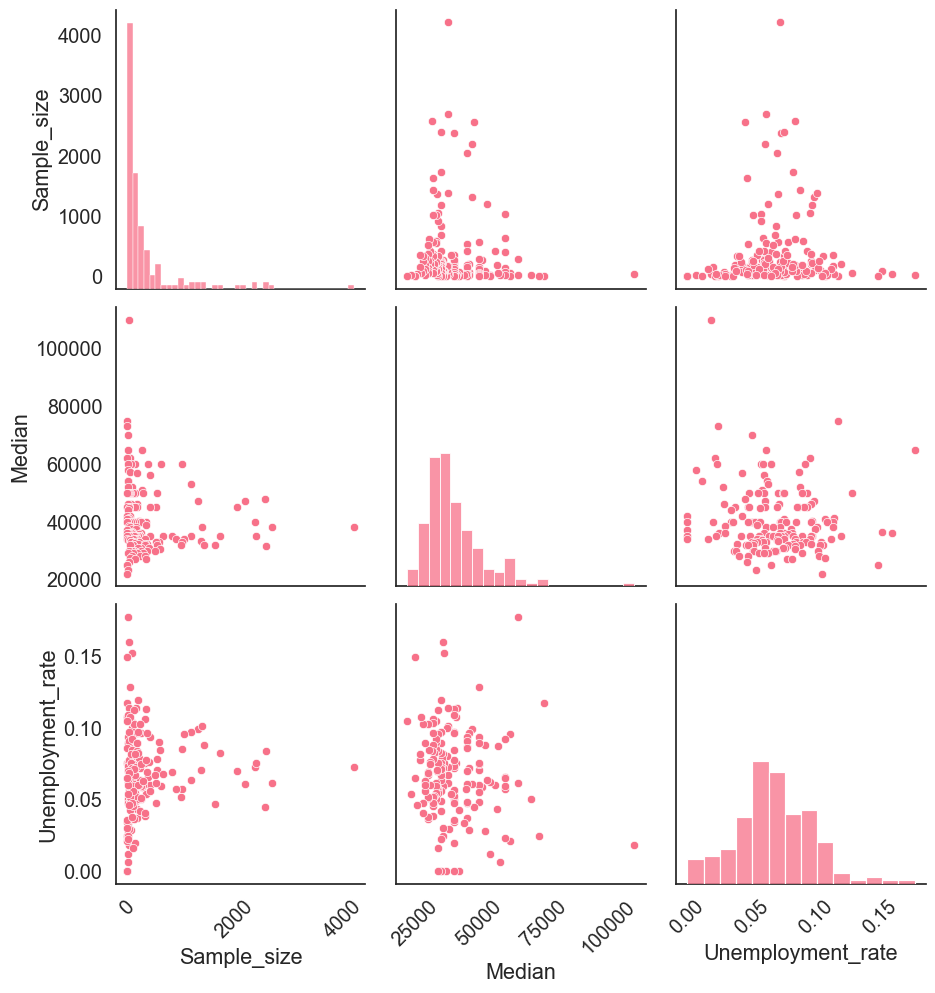

In [23]:
#creating scatter plots to explore the relationship and distribution between Sample_size & median, Sample_size, median & Unemployment_rate
pairs = [['Sample_size','Median'], ['Sample_size','Median','Unemployment_rate']]
for pair in range(len(pairs)):
    pairplot = sns.pairplot(recent_grads[pairs[pair]])
    pairplot.fig.set_size_inches(10,10)
    for ax in pairplot.axes.flat: #rorating x-axis lables
        ax.tick_params("x",labelrotation=45)
plt.show()

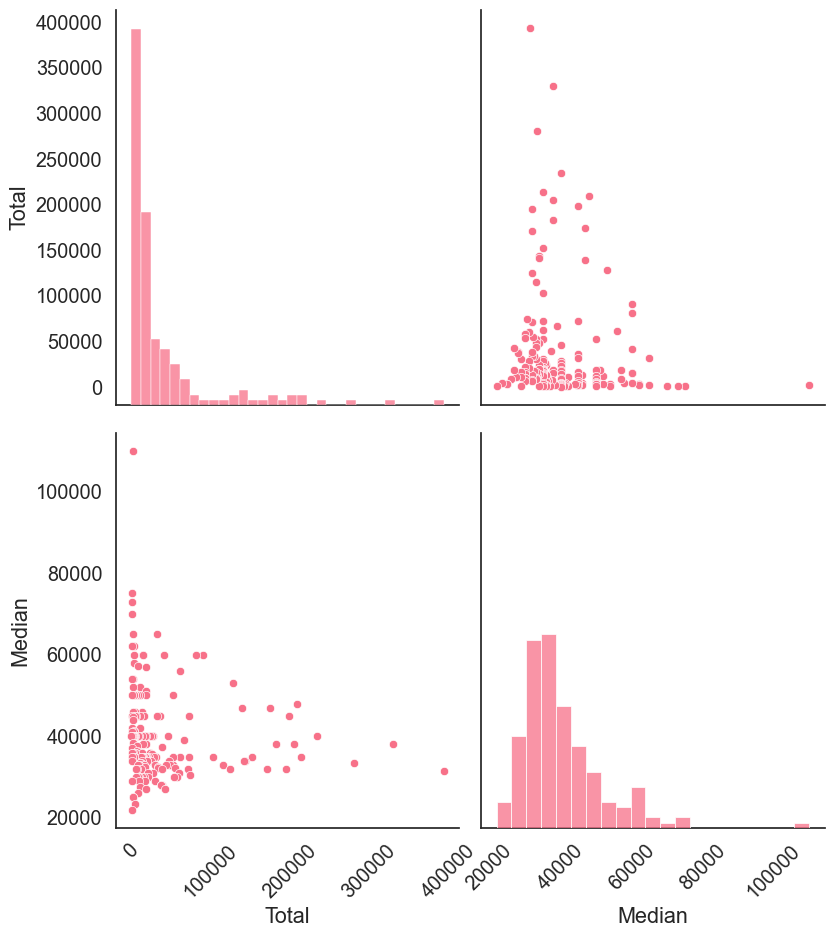

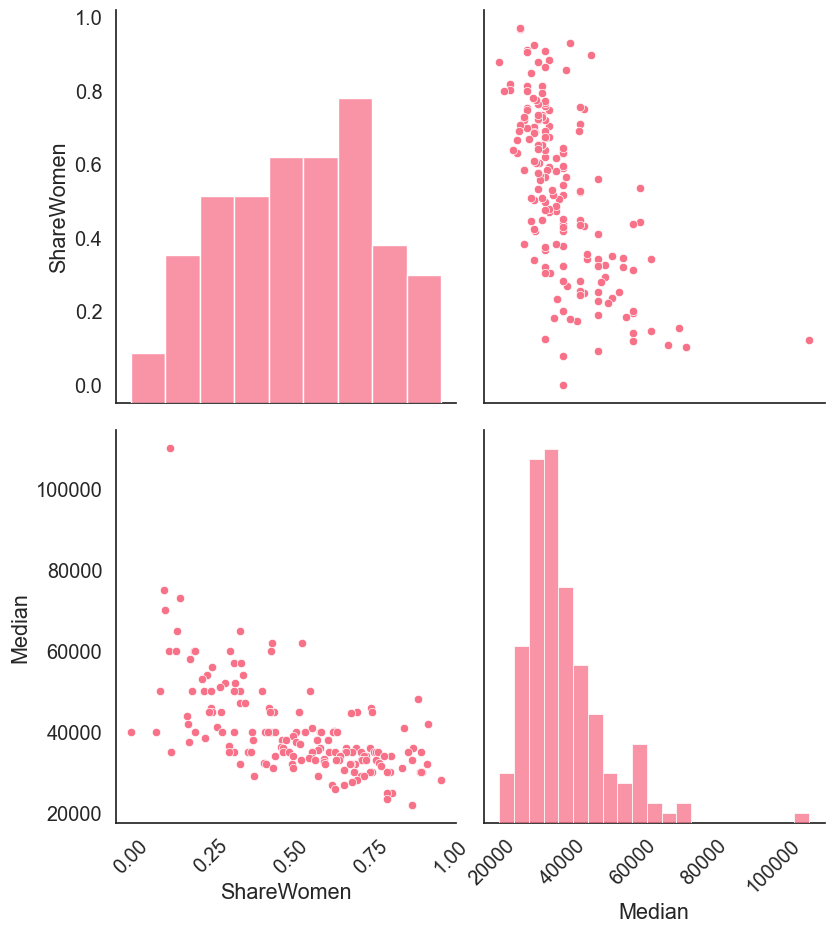

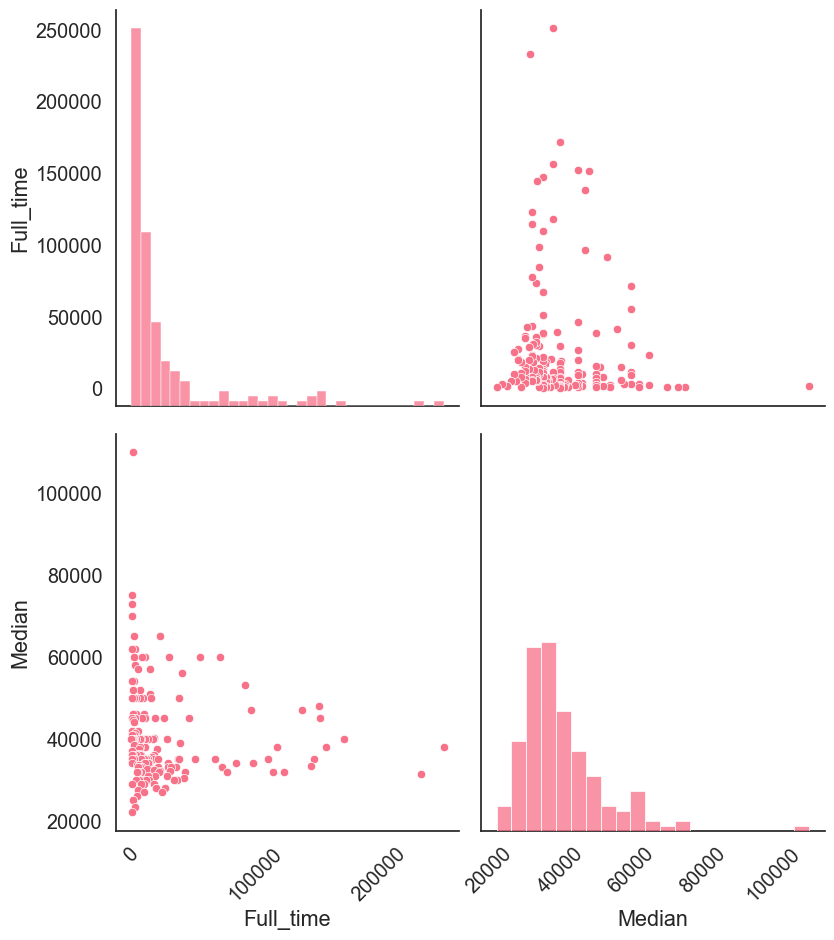

In [24]:
#creating scatter matrix to explore the 3 questions
pairs = [['Total','Median'],['ShareWomen','Median'],['Full_time','Median']]
for pair in range(len(pairs)):
    pairplot = sns.pairplot(recent_grads[pairs[pair]])
    pairplot.fig.set_size_inches(10,10)
    for ax in pairplot.axes.flat: #rotating x-axis labels
        ax.tick_params("x", labelrotation=45)
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_14284\3606568955.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(recent_grads[:10]['Major'], rotation='vertical')


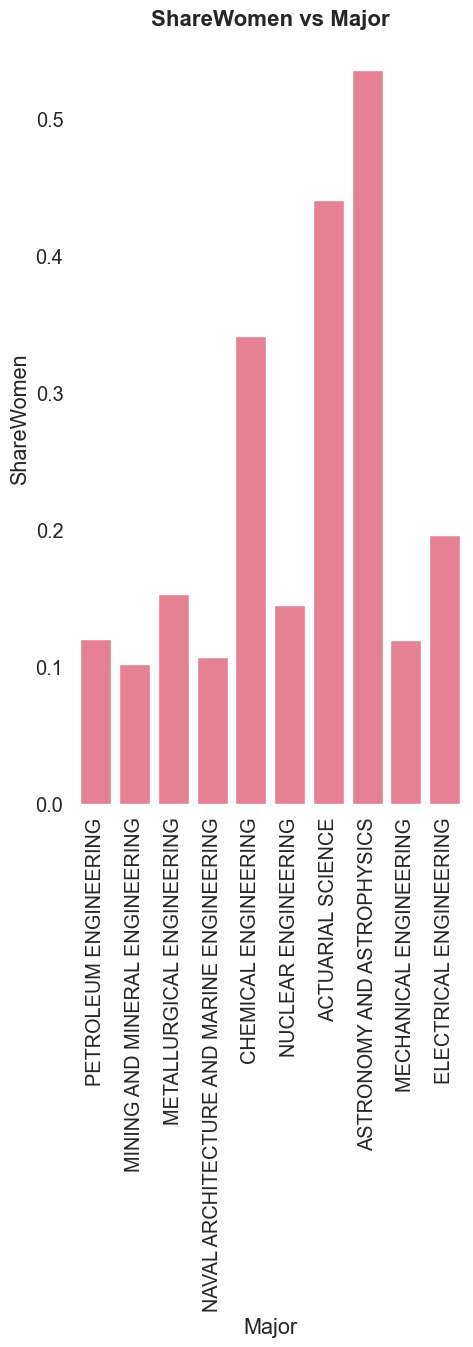

In [26]:
#creating bar plots to compare columns
#first 10 rows
fig, ax = plt.subplots(1,1, figsize =(5,10))

plt.xlabel('Major')
plt.ylabel('ShareWomen')
sns.barplot(x=recent_grads[:10]['Major'], y=recent_grads[:10]['ShareWomen'], errorbar=None)
ax.set_xticklabels(recent_grads[:10]['Major'], rotation='vertical')
sns.despine(left=True, bottom=True)
plt.title("ShareWomen vs Major", weight='bold').set_fontsize('16')
plt.show()

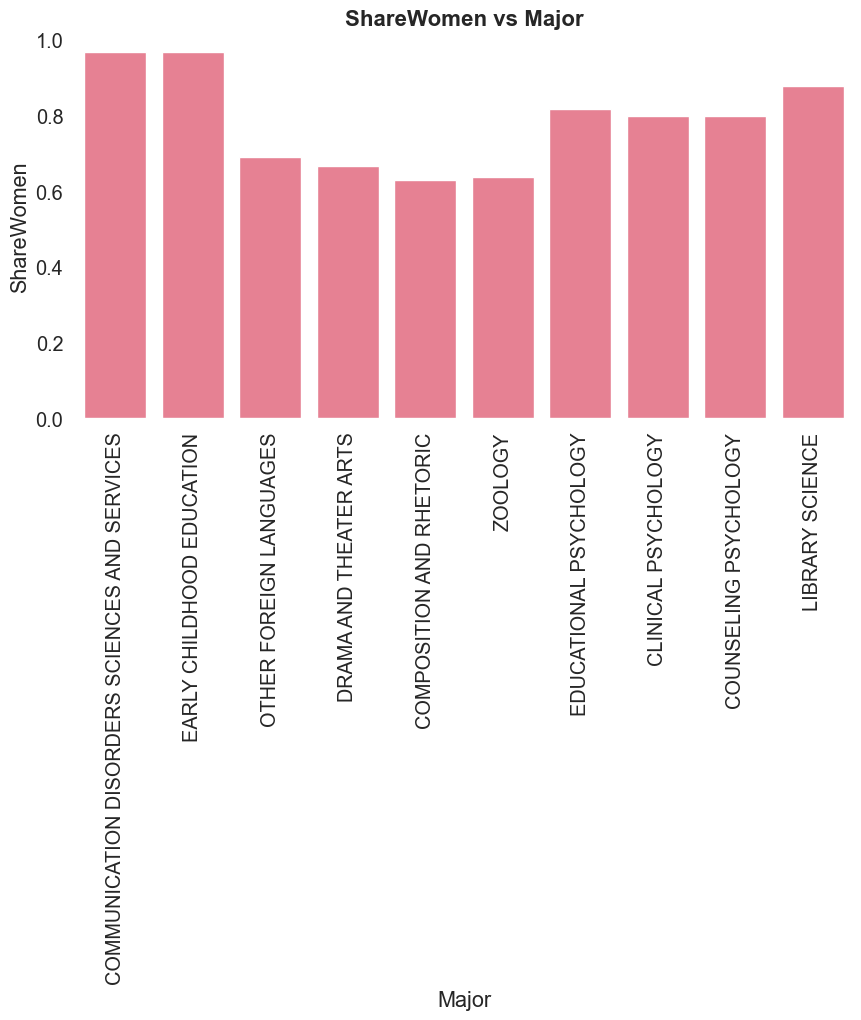

In [38]:
fig, ax = plt.subplots(figsize=(10, 5))

plt.xlabel('Major')
plt.ylabel('ShareWomen')
sns.barplot(x=recent_grads[-10:]['Major'], y=recent_grads[-10:]['ShareWomen'], ax=ax, errorbar=None)
# Define the positions of the x-axis ticks
x_ticks = range(len(recent_grads[-10:]['Major']))
# Set the tick positions and labels
ax.set_xticks(x_ticks)
ax.set_xticklabels(recent_grads[-10:]['Major'], rotation=90)
sns.despine(left=True, bottom=True) # Remove the left and bottom spines (axes lines)
plt.title("ShareWomen vs Major", weight='bold', fontsize=16)
plt.show()


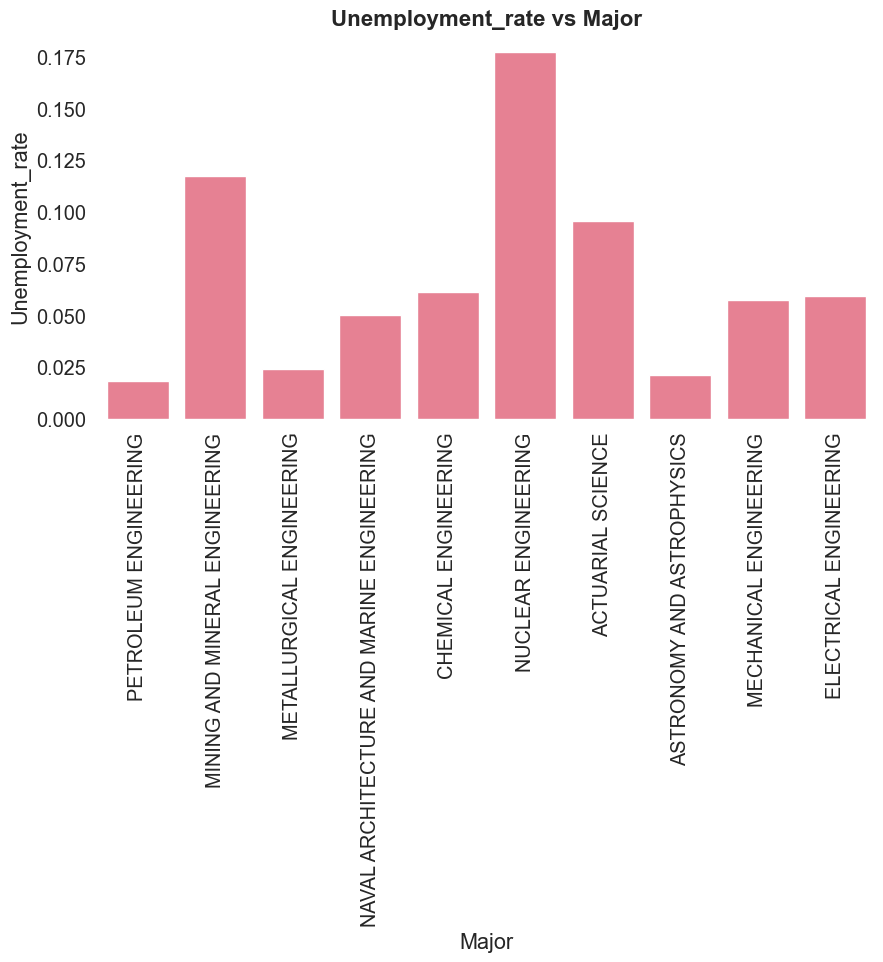

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Set labels for the x and y axes
plt.xlabel('Major')
plt.ylabel('Unemployment_rate')

sns.barplot(x=recent_grads[:10]['Major'], y=recent_grads[:10]['Unemployment_rate'], ax=ax, errorbar=None)

x_ticks = range(len(recent_grads[:10]['Major'])) # Define the positions of the x-axis ticks
ax.set_xticks(x_ticks)
ax.set_xticklabels(recent_grads[:10]['Major'], rotation=90)

sns.despine(left=True, bottom=True) # Remove the left and bottom spines (axes lines)

plt.title("Unemployment_rate vs Major", weight='bold', fontsize=16)

plt.show()


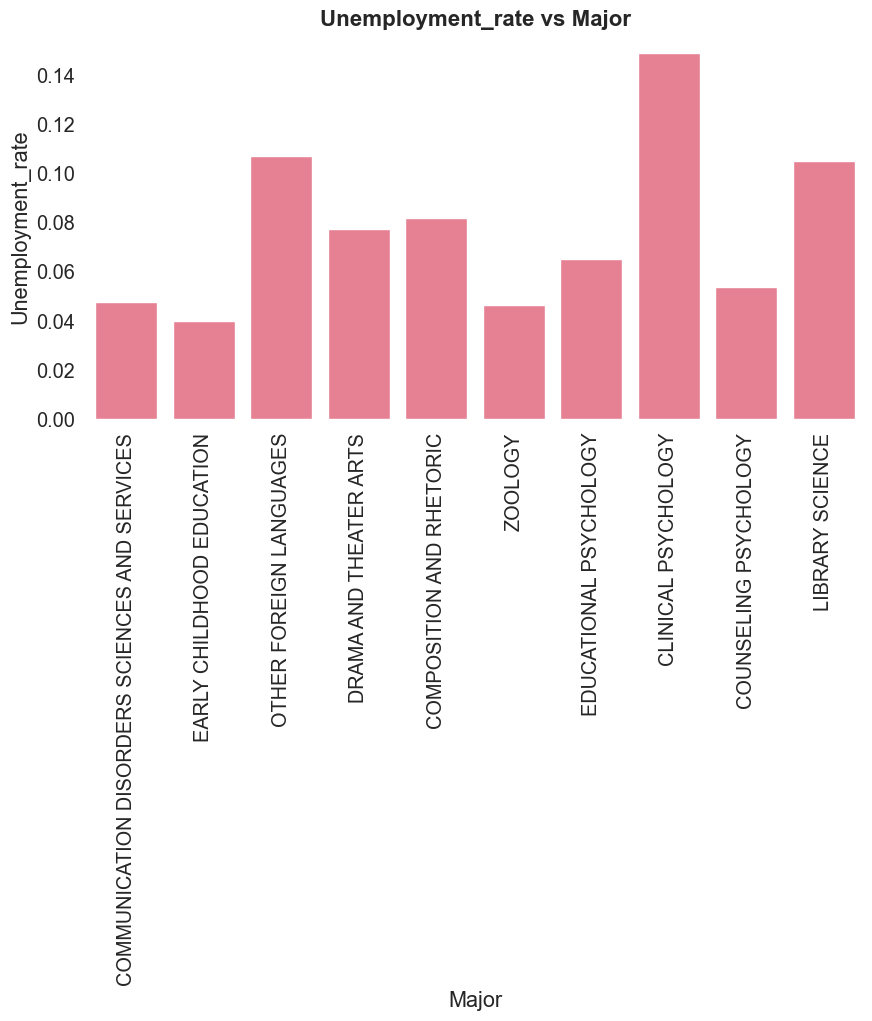

In [50]:


# Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Set labels for the x and y axes
plt.xlabel('Major')
plt.ylabel('Unemployment_rate')

# Use seaborn's barplot function
sns.barplot(x='Major', y='Unemployment_rate', data=recent_grads[-10:], errorbar=None, ax=ax)

# Define the positions of the x-axis ticks
x_ticks = range(len(recent_grads[-10:]))

# Set the tick positions and labels
ax.set_xticks(x_ticks)
ax.set_xticklabels(recent_grads[-10:]['Major'], rotation=90)

# Remove the left and bottom spines (axes lines)
sns.despine(left=True, bottom=True)

# Set the title and font size
plt.title("Unemployment_rate vs Major", weight='bold', fontsize=16)

# Show the plot
plt.show()
